In [93]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [94]:
df = pd.read_csv('./bayesian_uncertainty_without_unknown.csv')
df = df.rename(columns={
        'Bayesian prediction STD bal_acc': 'bayes_pred_std_acc',
        'Bayesian entropy bal_acc': 'bayes_entropy_acc'
})

df_unknown = pd.read_csv('./bayes_uncertainty_with_unknown.csv')
df_unknown = df_unknown.rename(columns={
        'Bayesian prediction STD bal_acc': 'bayes_pred_std_acc',
        'Bayesian entropy bal_acc': 'bayes_entropy_acc'
})

In [95]:
df.to_csv('/Users/roliveira/Desktop/without_unknown.csv', index=None)

In [96]:
cols = ['bayes_pred_std_acc', 'bayes_entropy_acc']

In [97]:
df_mean = df.groupby(['inside_labels']).mean()[cols]
df_unknown_mean = df_unknown.groupby(['inside_labels', 'unknown_labels']).mean()[cols]
#df_mean = df[cols]
#df_unknown_mean = df_unknown[cols]

In [98]:
df_mean.index

Index(['[0, 1, 4, 8]', '[0, 1, 6, 7]', '[0, 2, 4, 6]', '[0, 3, 6, 9]',
       '[0, 3, 7, 8]', '[0, 4, 5, 6]', '[0, 5, 6, 9]', '[1, 2, 6, 8]',
       '[1, 3, 5, 7]', '[1, 5, 6, 7]', '[1, 6, 8, 9]', '[2, 3, 6, 8]',
       '[2, 3, 7, 8]', '[2, 4, 7, 8]', '[2, 5, 7, 9]', '[2, 6, 7, 8]',
       '[3, 4, 7, 8]', '[3, 4, 8, 9]', '[3, 5, 7, 8]', '[4, 6, 8, 9]'],
      dtype='object', name='inside_labels')

In [99]:
#df_mean.drop(df_mean.index[12], inplace=True)
df_mean.drop(df_mean.index[15], inplace=True)

In [100]:
cols = ['dataset', 'inside_labels', 'unknown_labels',
        'only_inside_bayes_pred_std_acc', 'unknown_bayes_pred_std_acc',
        'only_inside_bayes_entropy_acc', 'unknown_bayes_entropy_acc']
results = pd.DataFrame(columns=cols)
cnt = 0
for ((inside_key, *inside_row), (unknown_key, *unknown_row)) in zip(df_mean.itertuples(), df_unknown_mean.itertuples()):
    print(cnt, inside_key, unknown_key)
    cnt += 1
    #assert inside_key == unknown_key[0]
    values = ['mnist', inside_key, unknown_key[1],
              inside_row[0], unknown_row[0],
              inside_row[1], unknown_row[1]]
    results.loc[len(results)] = values

0 [0, 1, 4, 8] ('[0, 1, 4, 8]', '[7, 9]')
1 [0, 1, 6, 7] ('[0, 1, 6, 7]', '[3, 9]')
2 [0, 2, 4, 6] ('[0, 2, 4, 6]', '[5, 9]')
3 [0, 3, 6, 9] ('[0, 3, 6, 9]', '[1, 5]')
4 [0, 3, 7, 8] ('[0, 3, 7, 8]', '[5, 6]')
5 [0, 4, 5, 6] ('[0, 4, 5, 6]', '[1, 3]')
6 [0, 5, 6, 9] ('[0, 5, 6, 9]', '[2, 3]')
7 [1, 2, 6, 8] ('[1, 2, 6, 8]', '[4, 9]')
8 [1, 3, 5, 7] ('[1, 3, 5, 7]', '[2, 8]')
9 [1, 5, 6, 7] ('[1, 5, 6, 7]', '[4, 8]')
10 [1, 6, 8, 9] ('[1, 6, 8, 9]', '[3, 4]')
11 [2, 3, 6, 8] ('[2, 3, 6, 8]', '[0, 5]')
12 [2, 3, 7, 8] ('[2, 4, 7, 8]', '[3, 6]')
13 [2, 4, 7, 8] ('[2, 5, 7, 9]', '[0, 8]')
14 [2, 5, 7, 9] ('[2, 6, 7, 8]', '[3, 5]')
15 [3, 4, 7, 8] ('[3, 4, 8, 9]', '[0, 7]')
16 [3, 4, 8, 9] ('[3, 5, 7, 8]', '[2, 4]')


In [101]:
results

,dataset,inside_labels,unknown_labels,only_inside_bayes_pred_std_acc,unknown_bayes_pred_std_acc,only_inside_bayes_entropy_acc,unknown_bayes_entropy_acc
0,mnist,"[0, 1, 4, 8]","[7, 9]",0.762329,0.802497,0.759386,0.786831
1,mnist,"[0, 1, 6, 7]","[3, 9]",0.801594,0.918339,0.797710,0.917604
2,mnist,"[0, 2, 4, 6]","[5, 9]",0.794697,0.895005,0.794868,0.900794
3,mnist,"[0, 3, 6, 9]","[1, 5]",0.777170,0.759685,0.776648,0.748508
4,mnist,"[0, 3, 7, 8]","[5, 6]",0.853816,0.861177,0.855724,0.854189
5,mnist,"[0, 4, 5, 6]","[1, 3]",0.798067,0.868982,0.795834,0.864298
6,mnist,"[0, 5, 6, 9]","[2, 3]",0.736994,0.793859,0.735595,0.791378
7,mnist,"[1, 2, 6, 8]","[4, 9]",0.755199,0.853033,0.755539,0.853362
8,mnist,"[1, 3, 5, 7]","[2, 8]",0.732251,0.890009,0.727089,0.892009
9,mnist,"[1, 5, 6, 7]","[4, 8]",0.774434,0.861038,0.766037,0.851488


In [102]:
results.to_csv('/Users/roliveira/Desktop/bla.csv', index=None)

<IPython.core.display.Javascript object>


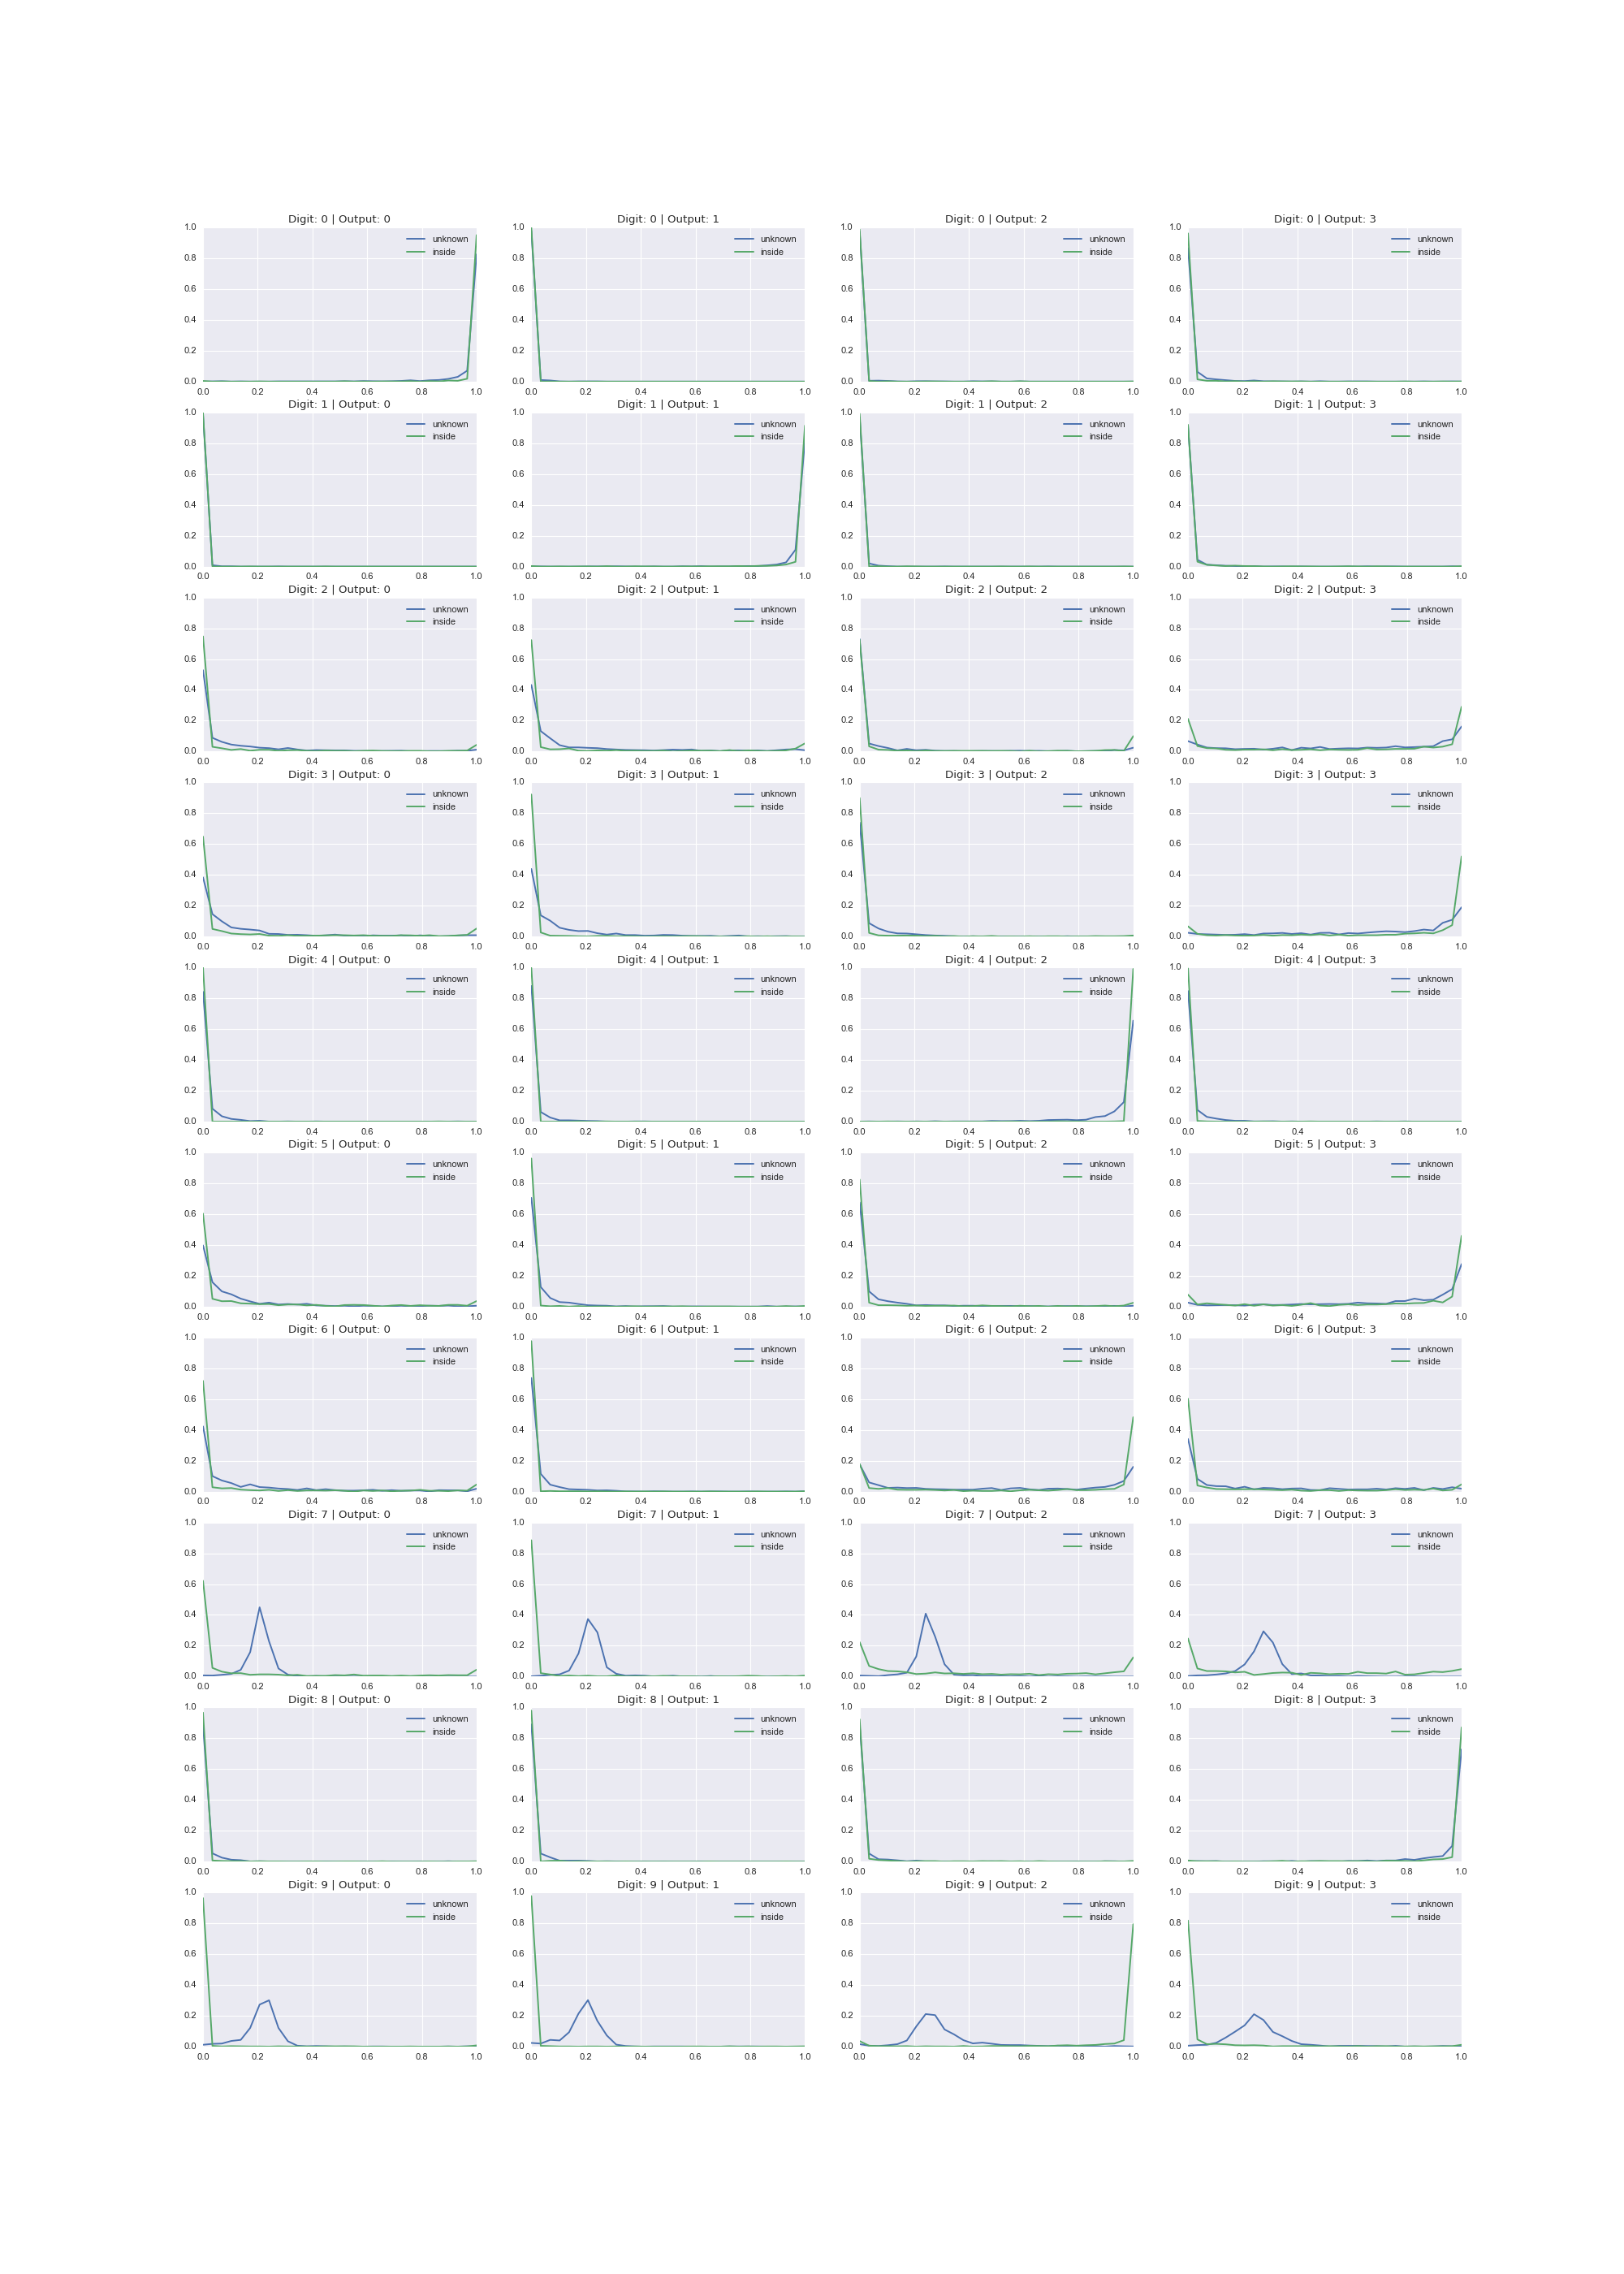

In [60]:
probs_unknown = np.load('../test_mnist_4labels_2unknown_1.1_test_probs_unknown.npy')
probs_inside = np.load('../test_mnist_4labels_2unknown_1.1_test_probs_normal.npy')
plt.figure(figsize=(25, 35))
it = 0
for i in range(10):
    for j in range(4):
        plt.subplot(10, 4, it+1)
        v = np.array(probs_unknown[i])[:, j]
        h, bins = np.histogram(v, range=[0.0, 1.0], bins=30)
        plt.plot(np.linspace(0, 1, 30), h/h.sum(), label='unknown')
        
        v = np.array(probs_inside[i])[:, j]
        h, bins = np.histogram(v, range=[0.0, 1.0], bins=30)
        plt.plot(np.linspace(0, 1, 30), h/h.sum(), label='inside')
        
        plt.ylim([0, 1])
        plt.xlim([0, 1])
        plt.title('Digit: ' + str(i) +  ' | Output: ' + str(j))
        plt.legend()
        it+=1